In [20]:
# Preliminaries needed for Python and to run R within a Python notebook
import rpy2.rinterface
%load_ext rpy2.ipython 

## Linear Regression "Overall Significance of Significance" to Compare Multiple Means

Sometimes it is of interest to compare multiple experimental conditions simultaneously. When the metric being compared is a mean, and a hypotheses of equality is being tested, we may use the $F$-test of overall significance in a linear regression to do so.

Symbolically speaking, this is the hypothesis we are testing: $$H_0: \mu_1 = \mu_2 = \cdots = \mu_m \text{ vs. } H_A: \mu_j \neq \mu_k \text{ for some } j \neq k$$
We do so by constructing an ordinary linear regression with using indicator (dummy) variables that indicate which of the $m$ conditions a particular observation comes from. Technically speaking, for $m$ experimental conditions we need $m-1$ indicator variables. Below this process is illustrated in both `R` and `Python`. We do this is in the context of the _Candy Crush_ example.

### First in Python

In [3]:
## Import necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Change working directory
os.chdir("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 5")

## Read in the data
candy = pd.read_csv('candycrush.csv')

Let's first look at the data:

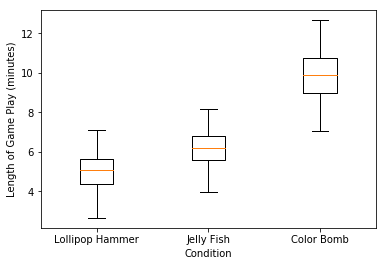

In [4]:
## Plot the data
y_1 = candy[candy["booster"]==1]["time"]
y_2 = candy[candy["booster"]==2]["time"]
y_3 = candy[candy["booster"]==3]["time"]
y_booster = [y_1, y_2, y_3]
plt.figure()
plt.boxplot(y_booster, labels = ["Lollipop Hammer", "Jelly Fish", "Color Bomb"])
plt.xlabel("Condition")
plt.ylabel("Length of Game Play (minutes)")
plt.show()

In the data the booster condition is coded as 1, 2 or 3. In order to ensure `Python` treats this as a categorical variable rather than a numeric variable (by coding it with indicators), we can use the `C()` function as follows:

In [19]:
## Perform the test by fitting a linear regression model
model = smf.ols('time ~ C(booster)', data = candy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     851.9
Date:                Tue, 02 Oct 2018   Prob (F-statistic):          3.28e-139
Time:                        19:02:34   Log-Likelihood:                -509.81
No. Observations:                 373   AIC:                             1026.
Df Residuals:                     370   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           5.0128      0.087     57.859      0.000         4.842     5.183
C(booster)[T.2]     1.1753      0.119      9.851      0.000         0.941     1.410
C(booster)[T.3]     4.8828      0.124     39.515      0.000         4.640     5.126
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.392
Skew:                          -0.039   Prob(JB):                        0.822
Kurtosis:                       2.862   Cond. No.                         3.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test statistic for this test is calculated to be 851.9 and in the context of a $F$-distribution with 2 and 370 degrees of freedom this value is quite extreme, as evidence by the p-value of $3.28 \times 10^{-139}$. Thus suggests that there is strong evidence against the null hypothesis, and that the average length of game play is not the same in each of the booster conditions (as was informally evidenced by the boxplots).

### Next in R

In [21]:
%%R
## Change working directory
setwd(dir = "/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 5/")

## Read in the data
candy <- read.csv(file = "candycrush.csv", header = T)

Again, let's look at the data:

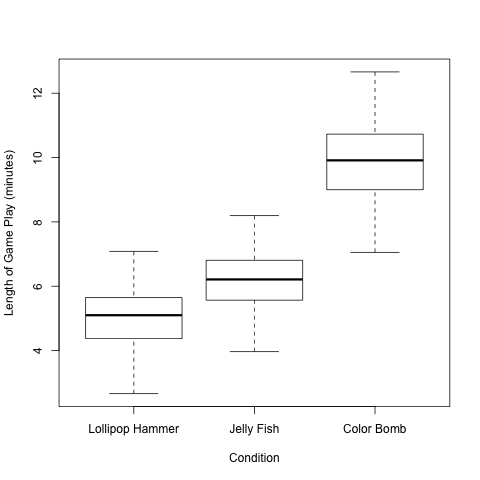

In [22]:
%%R
## Plot the data
boxplot(time ~ booster, data = candy, xaxt = "n", ylab = "Length of Game Play (minutes)", xlab = "Condition")
axis(side = 1, at = c(1,2,3), labels = c("Lollipop Hammer", "Jelly Fish", "Color Bomb"))

To force `R` to treat `booster` as a categorical variable rather than a numeric variable we can use the `factor()` function as follows:

In [23]:
%%R
## Perform the test by fitting a linear regression model
model <- lm(time ~ factor(booster), data = candy)
summary(model)


Call:
lm(formula = time ~ factor(booster), data = candy)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.84231 -0.69476  0.02617  0.65326  2.76681 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.01281    0.08664  57.859   <2e-16 ***
factor(booster)2  1.17528    0.11931   9.851   <2e-16 ***
factor(booster)3  4.88279    0.12357  39.515   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.953 on 370 degrees of freedom
Multiple R-squared:  0.8216,	Adjusted R-squared:  0.8206 
F-statistic: 851.9 on 2 and 370 DF,  p-value: < 2.2e-16



The final line of this output is the one we're interested in. We see that the answer matches exactly with what we found in Python.